In [18]:
#Import the libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Download and Unzip the dataset.

In [19]:
# url_to_the_zip_file = "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/34330/3265183/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1647437599&Signature=qVPxXAvAiFlZLpO%2Fp287NXm%2FlUOymBxRMs7NJKMGXlm3afW9PV9LuNalMJS56E%2BjsMSHh46ouLS6gNHYbyPwmdLSQiPpLQPGU6NTKTNprbDUOgYb2rqC4w6AgLOpdRh%2FGdabYAVAdjIh24Teoj5k%2Bs%2Fybm00sxAGf358%2BcxjEonvvUJDEhK7GTtv9NAFxAfsO%2F69xOWSkLEhjjnCwQ3QzfXWxbuYVnqlwy0dwQ6S%2F8iQappRaQg2%2BF9j76t1ay0B3Kg3ANj0P5EuVMDL2KVld3cQLiM7DPi9vQQV531T8snYsbiHjoE%2BhkH6w%2BWeULvu5UpDSaiVRepgtoscjgM8ig%3D%3D&response-content-disposition=attachment%3B+filename%3D2110446-data-science-and-data-engineering-2022.zip"
# new_file_name = "2110446-data-science-and-data-engineering-2022.zip"

# !rm -f "$new_file_name"
# !wget -c "$url_to_the_zip_file" -O "$new_file_name"
# !unzip "$new_file_name"

## read_csv()

In [20]:
def toDF(pm25_filename, temp_filename, wind_filename):
  pm25_df = pd.read_csv('datasci_dataset_2022/'+pm25_filename, names=['Time', 'PM25'], skiprows=1)
  pm25_df['Time'] = pd.to_datetime(pm25_df['Time'])
  # pm25_df['Time'] = pm25_df['Time'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
  # pm25_df['Time'] = pm25_df['Time'].dt.tz_localize(None)
  pm25_df.set_index('Time', inplace=True)
  pm25_df.columns = ['PM25']
  pm25_df = pm25_df[~pm25_df.index.duplicated(keep='first')]
  pm25_df.interpolate(inplace=True)
  pm25_df.index = pd.DatetimeIndex(pm25_df.index)

  temp_df = pd.read_csv('datasci_dataset_2022/'+temp_filename, names=['Time', 'Temp'], skiprows=1)
  temp_df['Time'] = pd.to_datetime(temp_df['Time'])
  temp_df.set_index(temp_df['Time'], inplace=True)
  temp_df.drop(columns={'Time'}, inplace=True)
  temp_df.columns = ['Temp']
  # pad() is similar to fillna() with forward filling
  temp_df = temp_df.resample('h').pad()
  # temp_df.index = pd.DatetimeIndex(temp_df.index)

  wind_df = pd.read_csv('datasci_dataset_2022/'+wind_filename, names=['Time', 'WindSpeed', 'WindDir'], skiprows=1)
  wind_df['Time'] = pd.to_datetime(wind_df['Time'])
  wind_df.set_index(wind_df['Time'], inplace=True)
  wind_df.drop(columns={'Time'}, inplace=True)
  wind_df.columns = ['WindSpeed', 'WindDir']
  # backward filling
  wind_df = wind_df.resample('h').bfill()
  # wind_df.index = pd.DatetimeIndex(wind_df.index)

  pm25_df['copy_index'] = pm25_df.index
  df = pd.merge(pm25_df, temp_df, left_index=True, right_index=True)
  df = pd.merge(df, wind_df, left_index=True, right_index=True)

  df = df[['Temp','WindSpeed','WindDir','PM25']]
  
  # padding first and last indices
  # df = df.ffill()
  # df = df.bfill()

  return df

In [21]:
def toDFtest(pm25_filename, temp_filename, wind_filename):
  pm25_df = pd.read_csv('datasci_dataset_2022/'+pm25_filename, names=['Time', 'PM25'], skiprows=1)
  pm25_df['Time'] = pd.to_datetime(pm25_df['Time'])
  pm25_df.set_index('Time', inplace=True)
  pm25_df.columns = ['PM25']
  pm25_df = pm25_df[~pm25_df.index.duplicated(keep='first')]
  pm25_df.index = pd.DatetimeIndex(pm25_df.index)

  temp_df = pd.read_csv('datasci_dataset_2022/'+temp_filename, names=['Time', 'Temp'], skiprows=1)
  temp_df['Time'] = pd.to_datetime(temp_df['Time'])
  temp_df.set_index(temp_df['Time'], inplace=True)
  temp_df.drop(columns={'Time'}, inplace=True)
  temp_df.columns = ['Temp']
  temp_df = temp_df.resample('h').bfill()

  wind_df = pd.read_csv('datasci_dataset_2022/'+wind_filename, names=['Time', 'WindSpeed', 'WindDir'], skiprows=1)
  wind_df['Time'] = pd.to_datetime(wind_df['Time'])
  wind_df.set_index(wind_df['Time'], inplace=True)
  wind_df.drop(columns={'Time'}, inplace=True)
  wind_df.columns = ['WindSpeed', 'WindDir']
  # backward filling
  wind_df = wind_df.resample('h').bfill()
  # wind_df.index = pd.DatetimeIndex(wind_df.index)

  pm25_df['copy_index'] = pm25_df.index
  df = pd.merge(pm25_df, temp_df, left_index=True, right_index=True)
  df = pd.merge(df, wind_df, left_index=True, right_index=True)

  df = df[['Temp','WindSpeed','WindDir','PM25']]

  return df

In [22]:
bkk_train = toDF('BKK/train/bkk_train.csv', 'BKK/train/bkk_temp_surface.csv', 'BKK/train/bkk_weather_wind.csv')
bkk_test = toDF('BKK/test/bkk_test.csv', 'BKK/test/bkk_temp_test.csv', 'BKK/test/bkk_wind_test.csv')

cnx_train = toDF('Chiangmai/train/chiangmai_train.csv', 'Chiangmai/train/chiangmai_temp_surface.csv', 'Chiangmai/train/chiangmai_weather_wind.csv')
cnx_test = toDF('Chiangmai/test/chiangmai_test.csv', 'Chiangmai/test/chiangmai_temp_test.csv', 'Chiangmai/test/chiangmai_wind_test.csv')

kkc_train = toDF('Khonkaen/train/khonkhan_train.csv', 'Khonkaen/train/khonkaen_temp_surface.csv', 'Khonkaen/train/khonkaen_weather_wind.csv')
kkc_test = toDF('Khonkaen/test/khonkhan_test.csv', 'Khonkaen/test/khonkaen_temp_test.csv', 'Khonkaen/test/khonkaen_wind_test.csv')

rayong_train = toDF('Rayong/train/rayong_train.csv', 'Rayong/train/rayong_temp_surface.csv', 'Rayong/train/rayong_weather_wind.csv')
rayong_test = toDF('Rayong/test/rayong_test.csv', 'Rayong/test/rayong_temp_test.csv', 'Rayong/test/rayong_wind_test.csv')

saraburi_train = toDF('Saraburi/train/saraburi_train.csv', 'Saraburi/train/saraburi_temp_surface.csv', 'Saraburi/train/saraburi_weather_wind.csv')
saraburi_test = toDF('Saraburi/test/saraburi_test.csv', 'Saraburi/test/saraburi_temp_test.csv', 'Saraburi/test/saraburi_wind_test.csv')

surat_train = toDF('Surat/train/surat_train.csv', 'Surat/train/surat_temp_surface.csv', 'Surat/train/surat_weather_wind.csv')
surat_test = toDF('Surat/test/surat_test.csv', 'Surat/test/surat_temp_test.csv', 'Surat/test/surat_wind_test.csv')

In [23]:
train_set={}
train_set['BKK'] = bkk_train
train_set['CNX'] = cnx_train
train_set['KKC'] = kkc_train
train_set['RAY'] = rayong_train
train_set['SARA'] = saraburi_train
train_set['SURAT'] = surat_train

test_set={}
test_set['BKK'] = bkk_test
test_set['CNX'] = cnx_test
test_set['KKC'] = kkc_test
test_set['RAY'] = rayong_test
test_set['SARA'] = saraburi_test
test_set['SURAT'] = surat_test

## Number of null values

### Before Dropping

In [24]:
null_counts_bkk_train = bkk_train.isnull().sum()
print("[bkk_train] Number of null values in each column:\n{}".format(null_counts_bkk_train))
print('\n')

null_counts_cnx_train = cnx_train.isnull().sum()
print("[cnx_train] Number of null values in each column:\n{}".format(null_counts_cnx_train))
print('\n')

null_counts_kkc_train = kkc_train.isnull().sum()
print("[kkc_train] Number of null values in each column:\n{}".format(null_counts_kkc_train))
print('\n')

null_counts_rayong_train = rayong_train.isnull().sum()
print("[rayong_train] Number of null values in each column:\n{}".format(null_counts_rayong_train))
print('\n')

null_counts_saraburi_train = saraburi_train.isnull().sum()
print("[saraburi_train] Number of null values in each column:\n{}".format(null_counts_saraburi_train))
print('\n')

null_counts_surat_train = surat_train.isnull().sum()
print("[surat_train] Number of null values in each column:\n{}".format(null_counts_surat_train))

[bkk_train] Number of null values in each column:
Temp         3
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[cnx_train] Number of null values in each column:
Temp         6
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[kkc_train] Number of null values in each column:
Temp         0
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[rayong_train] Number of null values in each column:
Temp         0
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[saraburi_train] Number of null values in each column:
Temp         0
WindSpeed    0
WindDir      0
PM25         0
dtype: int64


[surat_train] Number of null values in each column:
Temp         126
WindSpeed      0
WindDir        0
PM25           0
dtype: int64


### Drop null-valued rows (Temp & PM25)

In [25]:
bkk_train.dropna(subset=['Temp','PM25'], inplace=True)

cnx_train.dropna(subset=['Temp','PM25'], inplace=True)

kkc_train.dropna(subset=['Temp','PM25'], inplace=True)

rayong_train.dropna(subset=['Temp','PM25'], inplace=True)

saraburi_train.dropna(subset=['Temp','PM25'], inplace=True)

surat_train.dropna(subset=['Temp','PM25'], inplace=True)

## Graph Plotting

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kurtosis, skew

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)

In [27]:
def multiDisplot(dataset, col, hist=False, xlim=None):
  for prov, _ in dataset.items():
    sns.distplot(dataset[prov][col], hist=hist, label=prov)
    # print(f"{prov} {col}={dataset[prov][col].mean()}")
  plt.xlim(xlim)
  plt.legend()
  plt.show()

In [28]:
# multiDisplot(train_set, 'PM25', xlim=(-10, 120), hist=True)

In [29]:
# multiDisplot(train_set, 'Temp', hist=True)

In [30]:
# multiDisplot(train_set, 'WindDir', hist=True)

In [31]:
# multiDisplot(train_set, 'WindSpeed', hist=True)

## Handle outliers

In [32]:
class Handle_Outliers:
  def __init__(self, dataset):
    self.dataset=dataset.copy()
    self.dataShape={}

    for prov, dfcol in dataset.items():
      self.dataShape[prov] = {}
      for col, _ in dfcol.items():
        self.dataShape[prov][col] = {'Kurt':{}, 'Skew':{}}
   
  def plotIQR(self, province, col, title="", thresh=None, fig=None, subplots=None, figsize=None):
    dataset = self.dataset

    if subplots is None: subplots = [211, 212]
    if figsize is None: figsize = (10,8)


    if fig is not None:
      rows = subplots[0]//100
      cols = (subplots[0]%100)//10
      fig.add_subplot(rows, cols, subplots[0]%10)
    else:
      plt.figure(figsize=figsize)
      plt.subplot(subplots[0])

    plt.title(title)
    plt.xlim(dataset[province][col].min()/1.1, dataset[province][col].max()*1.1)
    if thresh:
      plt.axvline(x=thresh[province]['min'])
      plt.axvline(x=thresh[province]['max'])

    ax = dataset[province][col].plot(kind='kde')

    if fig is not None:
      rows = subplots[1]//100
      cols = (subplots[1]%100)//10
      fig.add_subplot(rows, cols, subplots[1]%10)
    else:
      plt.figure(figsize=figsize)
      plt.subplot(subplots[1])
      
    plt.xlim(dataset[province][col].min()/1.1, dataset[province][col].max()*1.1)
    sns.boxplot(x=dataset[province][col])

    if thresh is not None:
      plt.axvline(x=thresh[province]['min'])
      plt.axvline(x=thresh[province]['max'])

    if subplots is None:
      plt.show()

  def calcDataShape(self, province, col, verbose=0, save_slot=None):
    dataset = self.dataset

    kurtosis_value = kurtosis(dataset[province][col])
    skew_value = skew(dataset[province][col])

    if (verbose>0):
      print("\n")
      print(f"kurtosis_value = {kurtosis_value}")
      print(f"skew_value = {skew_value}")

    if (save_slot is not None):
      self.saveDataShape(province, col, kurtosis_value, skew_value, save_slot)
  
  def showDataShape(self, province, col, save_slot=None):
    dataShape = self.dataShape

    if (save_slot is not None):
      kurtosis_value = dataShape[province][col]['Kurt'][save_slot]
      skew_value = dataShape[province][col]['Skew'][save_slot]
      print(f"{save_slot}:")
      print(f"kurtosis_value = {kurtosis_value}")
      print(f"skew_value = {skew_value}")
      print("\n")

    else:
      for sav_slot, _ in dataShape[province][col]['Kurt'].items():
        kurtosis_value = dataShape[province][col]['Kurt'][sav_slot]
        skew_value = dataShape[province][col]['Skew'][sav_slot]
        print(f"{sav_slot}:")
        print(f"kurtosis_value = {kurtosis_value}")
        print(f"skew_value = {skew_value}")
        print("\n")
  
  def saveDataShape(self, province, col, kurt, skew, save_slot):
    dataShape = self.dataShape

    dataShape[province][col]['Kurt'][save_slot] = kurt
    dataShape[province][col]['Skew'][save_slot] = skew
  
  def addColumns(self, col, new_col, func):
    dataset = self.dataset
    dataShape = self.dataShape

    for prov, _ in dataset.items():
      dataset[prov][new_col] = func(dataset[prov][col])
      dataShape[prov][new_col] = {'Kurt':{}, 'Skew':{}}
  
  def calcOutliersMinMax(self, province, col, C_std):
    dataset = self.dataset

    thresh_min = dataset[province][col].mean() - C_std*dataset[province][col].std()
    thresh_min = 0 if (thresh_min<0) else thresh_min

    thresh_max = dataset[province][col].mean() + C_std*dataset[province][col].std()
    
    return thresh_min, thresh_max
  
  def setOutliersThreshold(self, province, col, new_col, thresh):
    dataset = self.dataset

    min, max = thresh[province]['min'], thresh[province]['max']

    dataset[province][new_col] = dataset[province][col]

    dataset[province].loc[dataset[province][new_col]<min, new_col] = min
    dataset[province].loc[dataset[province][new_col]>max, new_col] = max

### Using IQR to detect outliers

In [33]:
handle_outliers = Handle_Outliers(train_set)

#### Before Log

In [34]:
# handle_outliers.plotIQR('BKK', 'PM25', 'Bangkok_Train PM2.5')
# handle_outliers.calcDataShape('BKK', 'PM25', save_slot='Before')

In [35]:
# handle_outliers.plotIQR('CNX', 'PM25', "Chiangmai_Train PM2.5")
# handle_outliers.calcDataShape('CNX', 'PM25', save_slot='Before')

In [36]:
# handle_outliers.plotIQR('KKC', 'PM25', "Khonkaen_Train PM2.5")
# handle_outliers.calcDataShape('KKC', 'PM25', save_slot='Before')

In [37]:
# handle_outliers.plotIQR('RAY', 'PM25', "Rayong_Train PM2.5")
# handle_outliers.calcDataShape('RAY', 'PM25', save_slot='Before')

In [38]:
# handle_outliers.plotIQR("SARA", 'PM25', "Saraburi_Train PM2.5")
# handle_outliers.calcDataShape("SARA", 'PM25', save_slot='Before')

In [39]:
# handle_outliers.plotIQR('SURAT', 'PM25', "Surat_Train PM2.5")
# handle_outliers.calcDataShape('SURAT', 'PM25', save_slot='Before')

#### After Log

In [40]:
handle_outliers.addColumns('PM25', 'Log_PM25', lambda x: np.log(1+x))

In [41]:
# handle_outliers.plotIQR('BKK', 'Log_PM25', "Bangkok_Train Log(PM2.5)")
# handle_outliers.calcDataShape('BKK', 'Log_PM25', save_slot='After')

In [42]:
# handle_outliers.plotIQR('CNX', 'Log_PM25', "Chiangmai_Train Log(PM2.5)")
# handle_outliers.calcDataShape('CNX', 'Log_PM25', save_slot='After')

In [43]:
# handle_outliers.plotIQR('KKC', 'Log_PM25', "Khonkaen_Train Log(PM2.5)")
# handle_outliers.calcDataShape('KKC', 'Log_PM25', save_slot='After')

In [44]:
# handle_outliers.plotIQR('RAY', 'Log_PM25', "Rayong_Train Log(PM2.5)")
# handle_outliers.calcDataShape('RAY', 'Log_PM25', save_slot='After')

In [45]:
# handle_outliers.plotIQR('SARA', 'Log_PM25', "Saraburi_Train Log(PM2.5)")
# handle_outliers.calcDataShape('SARA', 'Log_PM25', save_slot='After')

In [46]:
# handle_outliers.plotIQR('SURAT', 'Log_PM25', "Surat_Train Log(PM2.5)")
# handle_outliers.calcDataShape('SURAT', 'Log_PM25', save_slot='After')

#### Set the outliers to min or max

In [47]:
# handle_outliers.showDataShape('BKK', 'PM25', 'Before')
# handle_outliers.showDataShape('BKK', 'Log_PM25')

In [48]:
thresh = {}

for prov, _ in train_set.items():
    thresh[prov] = {}
    thresh[prov]['min'], thresh[prov]['max'] = handle_outliers.calcOutliersMinMax(prov, 'Log_PM25', 3)
    handle_outliers.setOutliersThreshold(prov, 'Log_PM25', 'new_Log_PM25', thresh)

handle_outliers.addColumns('new_Log_PM25','new_PM25', lambda x: np.exp(x)-1)

##### Example 'Saraburi' : Boxplots of old and new PM2.5 after outlier handling

In [49]:
handle_outliers.dataset['SARA'].describe()

,Temp,WindSpeed,WindDir,PM25,Log_PM25,new_Log_PM25,new_PM25
count,26302.000000,26302.000000,26302.000000,26302.000000,26302.000000,26302.000000,26302.000000
mean,28.329245,21.015360,173.065546,33.852616,3.351286,3.354525,33.851236
std,4.062801,13.520995,83.727460,21.925800,0.671915,0.660619,21.777554
min,14.000000,0.000000,0.000000,1.000000,0.693147,1.335541,2.802054
25%,25.400000,11.000000,90.000000,18.000000,2.944439,2.944439,18.000000
50%,27.800000,18.000000,180.000000,29.000000,3.401197,3.401197,29.000000
75%,31.200000,28.000000,250.000000,44.000000,3.806662,3.806662,44.000000
max,40.900000,91.000000,360.000000,407.000000,6.011267,5.367030,213.225732


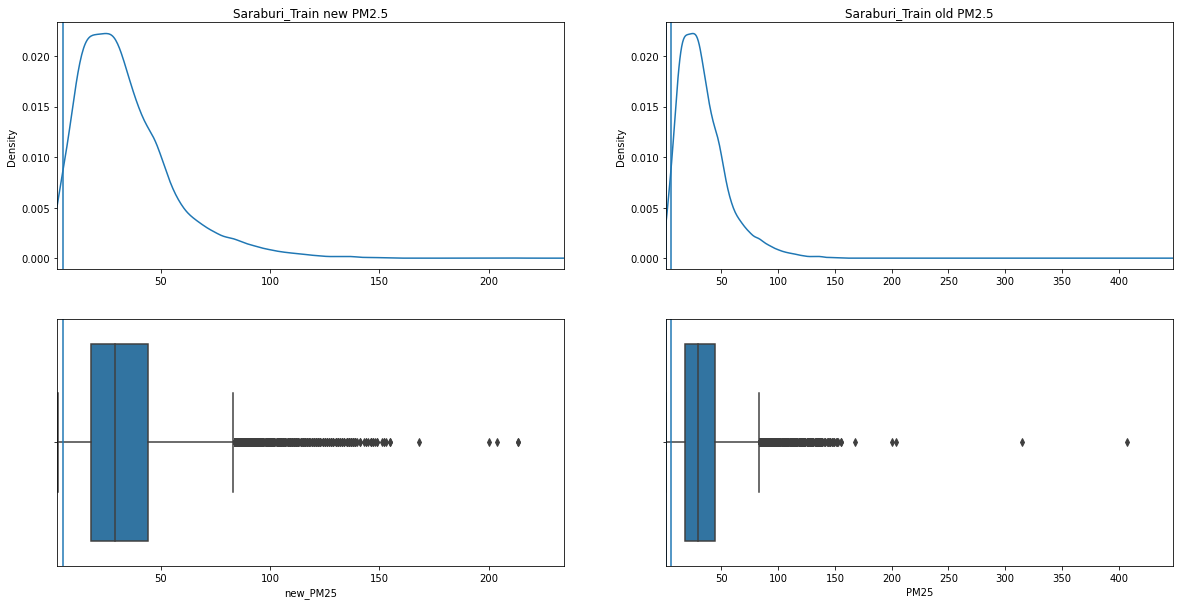

In [50]:
fig = plt.figure(figsize=(20,10))

handle_outliers.plotIQR('SARA', 'new_PM25', 'Saraburi_Train new PM2.5', thresh, fig=fig, subplots=[221, 223], figsize=(15,10))
handle_outliers.plotIQR('SARA', 'PM25', 'Saraburi_Train old PM2.5', thresh, fig=fig, subplots=[222, 224], figsize=(15,10))
plt.show()

## SARIMAX

In [51]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

import pickle

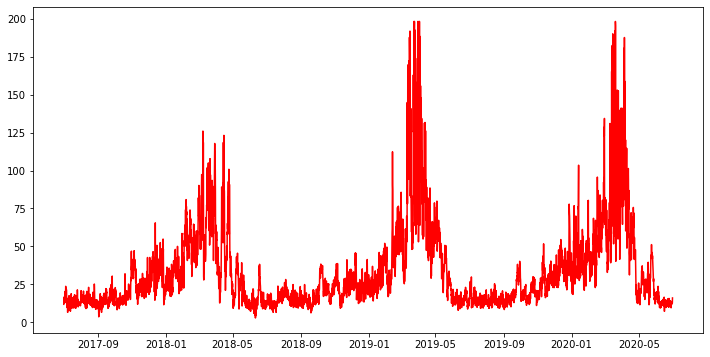

In [402]:
cnx_train_tmp = handle_outliers.dataset['CNX'][['new_PM25', 'Temp', 'WindSpeed', 'WindDir']]
cnx_train_tmp.rename(columns={'new_PM25':'PM25'}, inplace=True)

cnx_train_tmp = cnx_train_tmp.resample('6H').mean()
plt.figure(figsize=(12,6))
plt.plot(cnx_train_tmp['PM25'],'r')

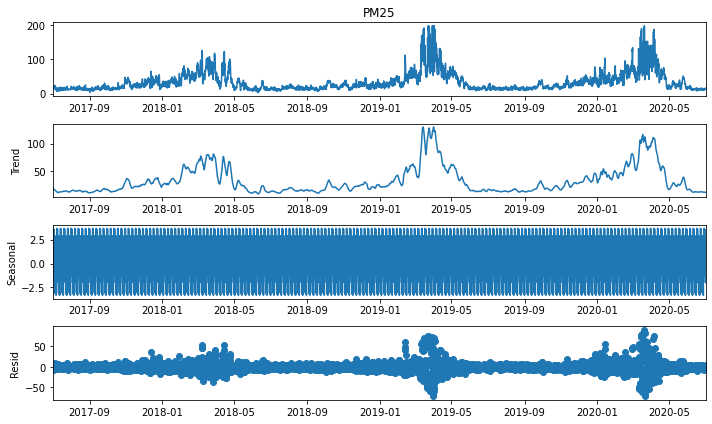

In [403]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(cnx_train_tmp['PM25'], model='additive',extrapolate_trend='freq')
result.plot()
plt.show()

In [392]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
import random
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [393]:
seasonal = result.seasonal
check_stationarity(seasonal)

The series is stationary


In [471]:
class SARIMAX_Custom():
    def __init__(self, X_train, order, seasonal_order, exog=None):
        self.X_train = X_train
        self.p, self.d, self.q = order
        self.P, self.D, self.Q, self.S = seasonal_order
        self.X_train_exog = exog
        self.params = {}
        self.params['p'] = [0.01]*self.p
        self.params['d'] = [0.01]*self.d
        self.params['q'] = [0.01]*self.q
        self.params['P'] = [0.01]*self.P
        self.params['D'] = [0.01]*self.D
        self.params['Q'] = [0.01]*self.Q
        self.params['c'] = 0.01
    
    def p_prediction(self, X_train, t):
        start = max(t-self.p, 0)
        X_train_t = np.array(X_train[start:t])[::-1]
        params_p = np.array(self.params['p'][:t-start])[::-1]

        p_pred = X_train_t.dot(params_p).sum()

        return p_pred

    def q_prediction(self, X_train, Error, t):
        start = max(t-self.q, 0)
        error_t = np.array(Error[start:t])[::-1]
        params_q = np.array(self.params['q'][:t-start])[::-1]

        q_pred = error_t.dot(params_q).sum()

        return q_pred

    def P_prediction(self, X_train, t):
        ss_c = t//self.S # season_count
        if (ss_c==0):
            return 0
        ss_c = min(ss_c, self.P)
        X_train_t = np.array(X_train[t-self.S::-self.S])[:ss_c]
        params_P = np.array(self.params['P'][::-1])[:ss_c]
        
        P_pred = X_train_t.dot(params_P).sum()

        return P_pred

    def Q_prediction(self, X_train, Error, t):
        ss_c = t//self.S # season_count
        if (ss_c==0 or self.params['Q'].shape[0]==0):
            return 0
        ss_c = min(ss_c, self.P)
        error_t = np.array(Error[t-self.S::-self.S])[:ss_c]
        params_Q = np.array(self.params['Q'][::-1])[:ss_c]

        Q_pred = error_t.dot(params_Q).sum()

        return Q_pred
    
    def update_params(self, pred, x, error_t, lr):
        self.params['p'] += (pred['p'])*error_t*lr
        # self.params['d'] += (x-pred['d'])*lr
        self.params['q'] += (pred['q'])*error_t*lr
        self.params['P'] += (pred['P'])*error_t*lr
        # self.params['D'] += (x-pred['D'])*lr
        self.params['Q'] += (pred['Q'])*error_t*lr
        self.params['c'] += (error_t)*lr

     
    def fit(self):
        X_train = self.X_train.copy()
        X_train = X_train.to_numpy()

        Error = [X_train[0]-X_train.mean()]

        lr = 1e-5

        for t in range(1,X_train.shape[0]):
            # lr *= 0.999
            p_pred = self.p_prediction(X_train, t)
            q_pred = self.q_prediction(X_train, Error, t)
            P_pred = self.P_prediction(X_train, t)
            Q_pred = self.Q_prediction(X_train, Error, t)

            y_pred = p_pred + q_pred + P_pred + Q_pred + self.params['c']

            error_t = X_train[t] - y_pred

            print(t, y_pred, X_train[t], error_t, lr)

            Error.append(error_t)

            pred = {'p':p_pred, 'q':q_pred, 'P':P_pred, 'Q':Q_pred, 'y':y_pred}

            self.update_params(pred, X_train[t], error_t, lr)
        

        return Error

In [463]:
cnx_test = test_set['CNX']
cnx_test = cnx_test.resample('6H').mean()
cnx_test.shape

(1464, 4)

In [464]:
train_size, valid_size = 7*cnx_train_tmp.shape[0]//10, 3*cnx_train_tmp.shape[0]//10

cnx_train, cnx_valid = cnx_train_tmp.iloc[:train_size], cnx_train_tmp.iloc[train_size: ],

In [472]:
best_order = (4, 0, 1)
best_seasonal_order = (0, 0, 1, 1461)

exog_columns = ['Temp', 'WindSpeed', 'WindDir']

In [473]:
model_cnx = SARIMAX_Custom(cnx_train['PM25'],
              best_order,
              best_seasonal_order)

In [474]:
ERR = model_cnx.fit()

1 -0.06436106783714632 14.333333333333334 14.39769440117048 1e-05
2 0.41549948860018404 12.5 12.084500511399815 1e-05
3 0.5191966459994038 16.666666666666664 16.14747002066726 1e-05
4 0.7312041712353882 14.83333333333333 14.102129162097942 1e-05
5 0.7464652131746777 13.833333333333334 13.086868120158655 1e-05
6 0.7360572123816682 14.166666666666664 13.430609454284996 1e-05
7 0.7617422089472135 16.666666666666668 15.904924457719455 1e-05
8 0.7929815495956214 12.833333333333334 12.040351783737712 1e-05
9 0.7377541044202179 18.833333333333332 18.095579228913113 1e-05
10 0.8589894987566531 20.333333333333332 19.47434383457668 1e-05
11 0.9482832020527979 18.333333333333332 17.385050131280533 1e-05
12 0.9547802176670606 14.666666666666666 13.711886448999605 1e-05
13 0.94531899867775 21.333333333333332 20.388014334655583 1e-05
14 1.0539303589176303 23.666666666666668 22.61273630774904 1e-05
15 1.1299095273532012 22.166666666666668 21.036757139313465 1e-05
16 1.1736279113536086 18.499999999999

In [475]:
np.sqrt((np.array(ERR)**2).sum()/365)

34.50663563322173

In [440]:
np.sqrt((np.array(ERR2)**2).sum()/365)

1.0068638468096132

In [476]:
model_cnx.params

{'p': array([0.24438838, 0.24438838, 0.24438838, 0.24438838]),
 'd': [],
 'q': array([0.02858573]),
 'P': array([], dtype=float64),
 'D': [],
 'Q': array([0.01]),
 'c': 0.0885274592848397}

In [477]:
paramss = model_cnx.params

In [478]:
X_test = cnx_valid['PM25'].copy()
X_test = X_test.to_numpy()

Error = [X_test[0]-cnx_train['PM25'].mean()]

for t in range(1,X_test.shape[0]):
    p_pred = model_cnx.p_prediction(X_test, t)
    q_pred = model_cnx.q_prediction(X_test, Error, t)
    P_pred = model_cnx.P_prediction(X_test, t)
    Q_pred = model_cnx.Q_prediction(X_test, Error, t)

    y_pred = p_pred + q_pred + P_pred + Q_pred + paramss['c']

    error_t = X_test[t] - y_pred

    print(t, y_pred, X_test[t], error_t)

    Error.append(error_t)

1 2.15855709814603 13.166666666666666 11.008109568520636
2 6.268523436755742 15.999999999999998 9.731476563244257
3 10.142243995070285 15.666666666666666 5.524422671596382
4 13.850733526249165 12.166666666666666 -1.684066859582499
5 13.970524726866394 14.0 0.029475273133606095
6 14.223164569715415 12.666666666666666 -1.556497903048749
7 13.363200433780364 16.833333333333332 3.4701328995529686
8 13.79201014355397 11.833333333333334 -1.958676810220636
9 13.555360836001084 17.333333333333332 3.7779724973322484
10 14.53397509920802 21.833333333333332 7.299358234125313
11 16.874863298112356 21.0 4.125136701887644
12 17.802410752172612 19.333333333333332 1.5309225811607199
13 19.561166071567246 17.333333333333332 -2.2278327382339143
14 19.45371928870231 9.5 -9.95371928870231
15 16.21874581352623 12.166666666666666 -4.052079146859564
16 14.228684526446315 10.000000000000002 -4.2286845264463135
17 11.94267793554665 12.666666666666666 0.7239887311200164
18 10.943774641831054 10.166666666666668 

In [479]:
np.sqrt((np.array(Error)**2).sum()/365)

25.364208163346127

In [ ]:
mod_cnx = SARIMAX(cnx_train['PM25'],
              exog=cnx_train[exog_columns],
              order=best_order,
              seasonal_order=best_seasonal_order,
              enforce_stationarity=False,
              enforce_invertibility=False)

results_cnx = mod_cnx.fit()

print(results_cnx.summary().tables[1])

In [ ]:
# Open file - Write binary mode
model_file = open('mod_cnx[0-1-1_1-1-0-365].model', 'wb')

# Save Decision tree model
pickle.dump(mod_cnx, model_file)

# Close file
model_file.close()

In [ ]:
test_exog = pd.concat((cnx_valid[exog_columns], cnx_test[exog_columns]), axis=0)

NameError: name 'pd' is not defined

In [ ]:
test_exog.shape

(2928, 3)

In [ ]:
bkk_pred = results_cnx.get_prediction(start=bkk_test.index[0], end=bkk_test.index[-1], exog=test_exog, dynamic=False)
bkk_pred_ci = bkk_pred.conf_int()

In [ ]:
bkk_data = pd.concat((bkk_train, cnx_valid, bkk_test), axis=0)

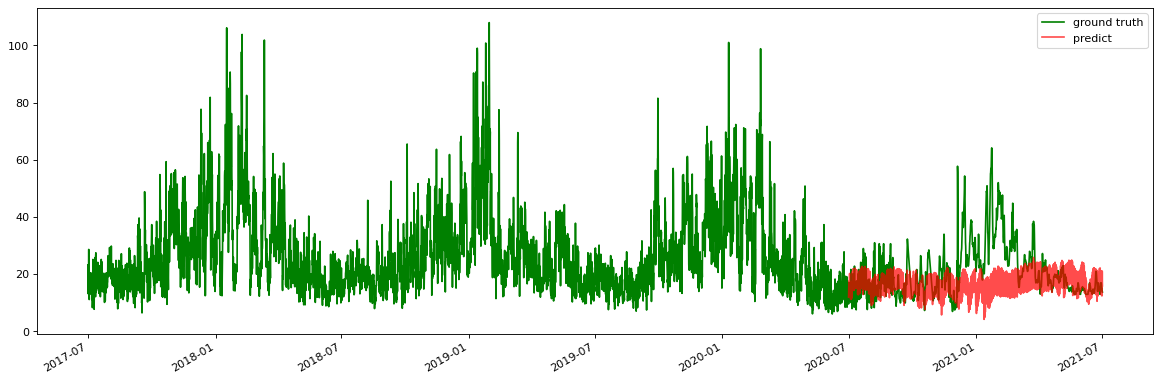

In [ ]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(bkk_data['PM25'], color='g',label='ground truth')
bkk_pred.predicted_mean.plot(alpha=.7, color='r',label='predict')
plt.legend(loc="upper right")

plt.show()

# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV